[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/DHI/tsod/blob/main/notebooks/Getting%20started.ipynb)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# if you run this on Colab, don't forget to install tsod first
# pip install tsod # from PyPI
# pip install https://github.com/DHI/tsod/archive/main.zip # dev version
import tsod

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/DHI/tsod/main/tests/data/example.csv", parse_dates=True, index_col=0)
df.head()

,value
datetime,
2000-01-01 00:00:00,0.000000
2000-01-01 01:00:00,1.152781
2000-01-01 02:00:00,1.450556
2000-01-01 03:00:00,0.958643
2000-01-01 04:00:00,1.174895


In [5]:
series = df.value

In [6]:
type(series)

pandas.core.series.Series

# Range

In [38]:

rd = tsod.RangeDetector(min_value=0.01, max_value=2.0)

res = rd.detect(series)
series[res]

datetime
2000-01-01 00:00:00    0.0
2000-01-01 13:00:00    3.0
2000-01-01 14:00:00    3.0
2000-01-03 07:00:00    2.5
2000-01-04 15:00:00    0.0
Name: value, dtype: float64

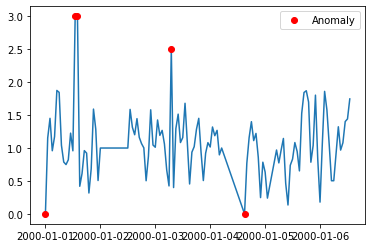

In [39]:
plt.plot(series)
plt.plot(series[res], 'ro',label='Anomaly')
plt.legend()

# Constant value

In [9]:
cd = tsod.ConstantValueDetector()

res = cd.detect(series)
series[res]

datetime
2000-01-02 04:00:00    1.0
2000-01-02 05:00:00    1.0
2000-01-02 06:00:00    1.0
2000-01-02 07:00:00    1.0
2000-01-02 08:00:00    1.0
2000-01-02 09:00:00    1.0
2000-01-02 10:00:00    1.0
2000-01-02 11:00:00    1.0
2000-01-02 12:00:00    1.0
Name: value, dtype: float64

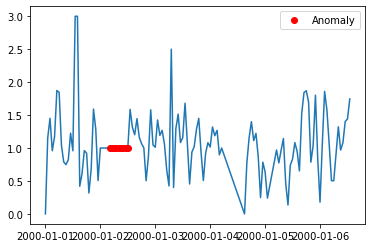

In [10]:
plt.plot(series)
plt.plot(series[res], 'ro',label='Anomaly')
plt.legend()

# Combination

In [12]:
combined = tsod.CombinedDetector([tsod.RangeDetector(max_value=2.0),
                                     tsod.ConstantValueDetector()])

res = combined.detect(series)
series[res]

datetime
2000-01-01 13:00:00    3.0
2000-01-01 14:00:00    3.0
2000-01-02 04:00:00    1.0
2000-01-02 05:00:00    1.0
2000-01-02 06:00:00    1.0
2000-01-02 07:00:00    1.0
2000-01-02 08:00:00    1.0
2000-01-02 09:00:00    1.0
2000-01-02 10:00:00    1.0
2000-01-02 11:00:00    1.0
2000-01-02 12:00:00    1.0
2000-01-03 07:00:00    2.5
Name: value, dtype: float64

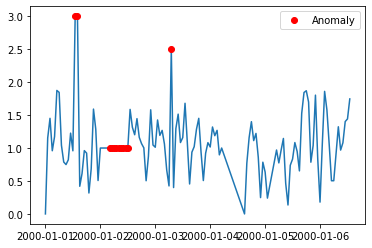

In [13]:
plt.plot(series)
plt.plot(series[res], 'ro',label='Anomaly')
plt.legend()

# Constant gradient

In [14]:
cgd = tsod.ConstantGradientDetector()

res = cgd.detect(series)

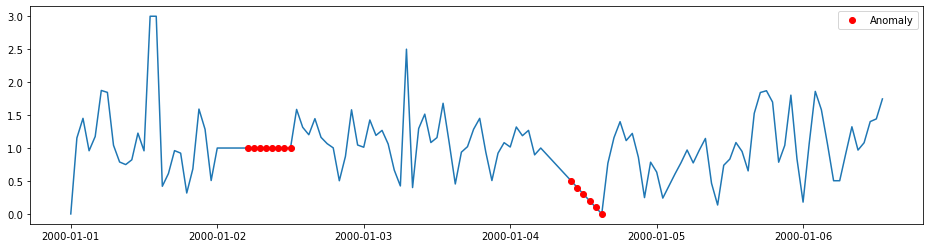

In [15]:
plt.figure(figsize=(16,4))
plt.plot(series)
plt.plot(series[res], 'ro',label='Anomaly')
plt.legend()

# Max abs gradient

Text(0.5, 1.0, 'MaxAbsGradientDetector(1.153/hr)')

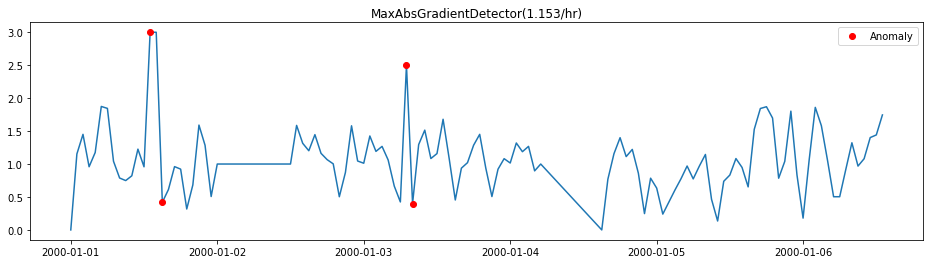

In [31]:

magd = tsod.MaxAbsGradientDetector()

magd.fit(series[0:10])

res = magd.detect(series)
plt.figure(figsize=(16,4))
plt.plot(series)
plt.plot(series[res], 'ro',label='Anomaly')
plt.legend()
plt.title(magd)